In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [34]:
def get_data():
    #  alpha     CL        CD       CDp       Cm    Top Xtr Bot Xtr   Cpmin    Chinge    XCp    
    with open("data2.txt", "r") as file:
        numbers = [[],[],[],[],[],[],[],[],[],[],[],[]]
        for line in file:
            line = line.strip()
            words = line.split()
            for i in range(len(words)):
                try:
                    numbers[i].append(float(words[i]))
                except:
                    continue

    del numbers[0][0]
    del numbers[1][0]
    del numbers[5][0]
    del numbers[7][0]
    del numbers[10][0]
    del numbers[2][0]
    del numbers[2][0]
    del numbers[4][0]
    del numbers[4][0]
    
    return numbers
    
def read_cps(alpha):
    with open(f"{alpha}deg.txt", 'r') as file:
        bottom_r = True
        bottom = [[],[],[]]
        top = [[],[],[]]
        for line in file:
            line = line.strip().split()
            try:
                data = [float(line[i]) for i in range(len(line))]
            except:
                continue
                
            if data[0] == 0.0:
                bottom[0].append(data[0])
                bottom[1].append(data[1])
                bottom[2].append(data[2])
                bottom_r = False
            
            if bottom_r:
                bottom[0].append(data[0])
                bottom[1].append(data[1])
                bottom[2].append(data[2])
            else:
                top[0].append(data[0])
                top[1].append(data[1])
                top[2].append(data[2])
    
    inviscid = [bottom[0].copy(), bottom[1].copy()]
    inviscid[0].extend(top[0])
    inviscid[1].extend(top[1])
    viscous = [bottom[0].copy(), bottom[2].copy()]
    viscous[0].extend(top[0])
    viscous[1].extend(top[2])
    return bottom, top, inviscid, viscous

In [3]:
numbers = get_data()
alphas = numbers[0]
cls = numbers[1]
cds = numbers[2]

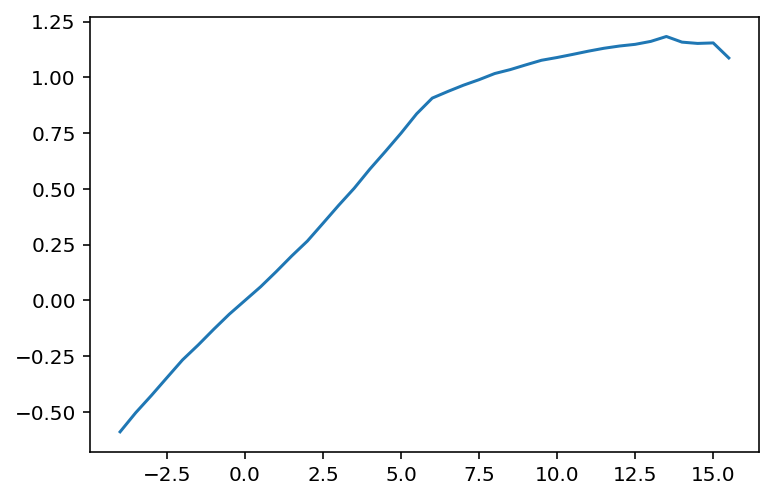

In [4]:
plt.plot(alphas, cls)

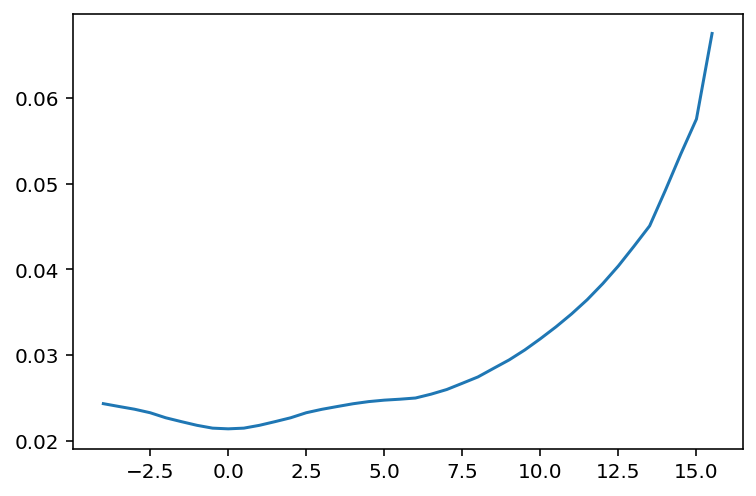

In [5]:
plt.plot(alphas, cds)

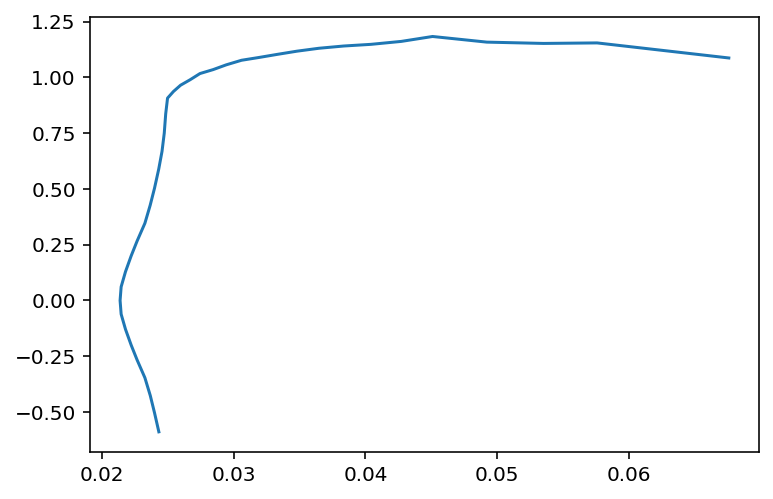

In [6]:
plt.plot(cds, cls)

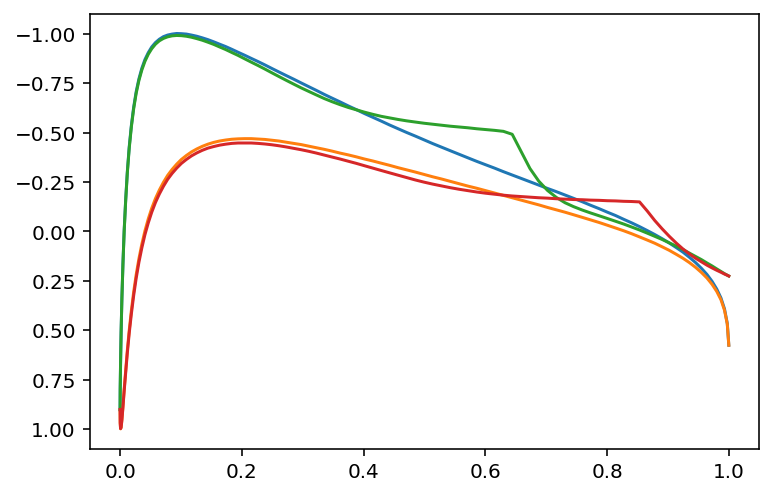

In [37]:
bottom, top, viscous, inviscid = read_cps(2)
plt.plot(bottom[0], bottom[1])
plt.plot(top[0], top[1])

plt.plot(bottom[0], bottom[2])
plt.plot(top[0], top[2])
plt.gca().invert_yaxis()

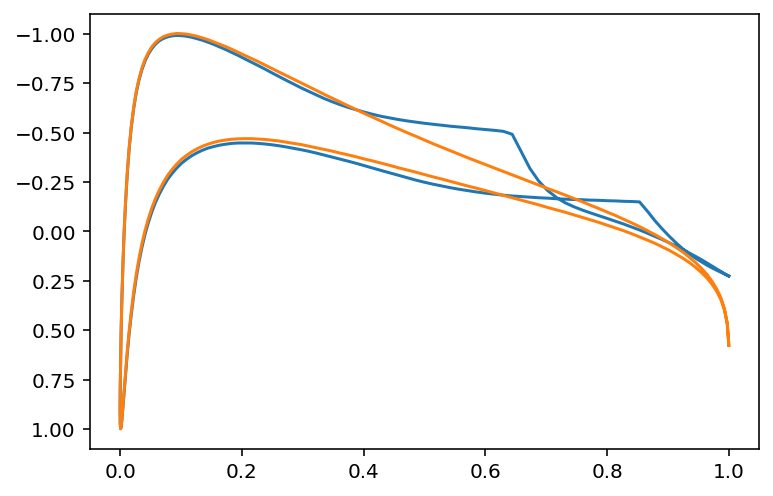

In [38]:
bottom, top, viscous, inviscid = read_cps(2)
plt.plot(inviscid[0], inviscid[1])
plt.plot(viscous[0], viscous[1])

plt.gca().invert_yaxis()

In [33]:
len(bottom[0])

300